In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

import os
import cv2

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#setting the directories for the data

#image proccessing thing from all the way below :/
def process_image(image):
    image = cv2.resize(image,(32,60)) # resize value could either be (65,120), (32,60) or (22,40). idk if latter gives up too much detail, third is too little detail
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image/255
    return image

#for the x data set
x_train_dir =  r"screenshots\Train"
x_test_dir = r"screenshots\Test"

#x data function
#going through the image folders
def get_images(dir):
    #temp variables
    r = []
    imgs = []
    #iterates through all the images in the train/test
    for root, dirs, files in os.walk(dir):
        for name in files:
            #makes a list of the images file names
            r.append(os.path.join(root, name))

    #gets the image from file name
    for file in r:
        pic = cv2.imread(file)
        pic = process_image(pic)
        imgs.append(pic)
    return np.array(imgs)

x_train = get_images(x_train_dir)
x_test = get_images(x_test_dir)

In [3]:
#for the y dataset
base = r"screenshots\\"

#y training data
train_start_menu_dir = base + r"Train\0 Start Menu"
train_in_game_menu_dir = base + r"Train\1 In Game"
train_second_chance_dir = base + r"Train\2 Second Chance"
train_rewards_dir = base + r"Train\3 Rewards"
train_replay_and_pause_dir = base + r"Train\4 Replay and Pause"

#puts all the directories in a list to be iterated through
y_train_dir = [train_start_menu_dir,train_in_game_menu_dir,train_second_chance_dir,train_rewards_dir,train_replay_and_pause_dir]

#y testing data
test_start_menu_dir = base + r"Test\0 Start Menu"
test_in_game_menu_dir = base + r"Test\1 In Game"
test_second_chance_dir = base + r"Test\2 Second Chance"
test_rewards_dir = base + r"Test\3 Rewards"
test_replay_and_pause_dir = base + r"Test\4 Replay and Pause"

#puts all the directories in a list to be iterated through
y_test_dir = [test_start_menu_dir,test_in_game_menu_dir,test_second_chance_dir,test_rewards_dir,test_replay_and_pause_dir]

#function to get the classes of the images
def get_labels(list):
    #temporary variables
    temp_classes = []
    label = 0

    #goes through the list containg the subfolders
    for folder in list:
        #goes through the subfolder containg one class each
        for root, dirs, files in os.walk(folder):
            #goes through each image and adds the label to the label list 
            for name in files:
                temp_classes.append(label)
        #adds one for each data class, to correspond with correct class
        label += 1

    temp_classes = np.array(temp_classes)
    return temp_classes

y_train = get_labels(y_train_dir)
y_test = get_labels(y_test_dir)

print(y_train.shape)
print(y_test.shape)

y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

print(np.unique(y_test))
print(y_cat_test.shape)
print(y_cat_test[0])

(645,)
(277,)
[0 1 2 3 4]
(277, 5)
[1. 0. 0. 0. 0.]


443
(60, 32)
min: 0.023529411764705882  max: 1.0
label: 1 [0. 1. 0. 0. 0.]


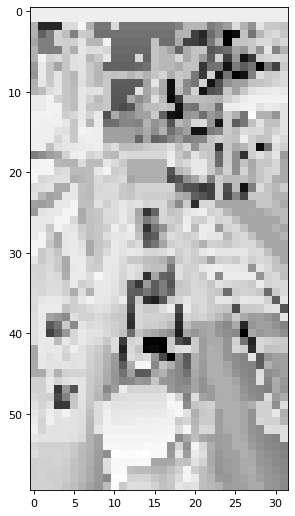

In [5]:
#this cell is just for testing

i = np.random.randint(0,len(x_train))
#i = 462
print(i)
image = x_train[i]

#image proccessing
'''
image = cv2.resize(image,(32,60)) # resize value could either be (65,120), (32,60) or (22,40). idk if latter gives up too much detail, third is too little detail
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image/255
'''

print(image.shape)
print('min:', image.min(),' max:', image.max())
print('label:',y_train[i],y_cat_train[i])

figure(figsize=(10, 8), dpi=80)
plt.imshow(image, cmap="Greys")

In [8]:
#reshape the x/y t/t to proper shape
print('x_train shape:',x_train.shape,'x_test shape:',x_test.shape)

x_train = x_train.reshape(645,60,32,1)
x_test = x_test.reshape(277,60,32,1)

print('x_train shape:',x_train.shape,'x_test shape:',x_test.shape)

x_train shape: (645, 60, 32) x_test shape: (277, 60, 32)
x_train shape: (645, 60, 32, 1) x_test shape: (277, 60, 32, 1)


In [39]:
#making the model

model = Sequential()

model.add(Conv2D(filters=128,kernel_size=(4,4),strides=(8,15),padding='valid',input_shape=(32,60,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(5,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

model.fit(x_train,y_cat_train,epochs=100,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9984 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 8/100
2

In [ ]:
metrics = pd.DataFrame(model.history.history)
print(metrics)
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [50]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets